## Importing Libraries

In this cell, we import all the necessary libraries for the project:
- `TensorFlow` and `Keras` for building and training the deep learning model.
- `ImageDataGenerator` for loading and augmenting image data.
- `Matplotlib` for plotting training metrics.
- `scikit-learn` for generating classification reports and confusion matrix.


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns




##  Data Preparation

Here we set up paths to the dataset folders and define `ImageDataGenerator` for:
- Data rescaling (normalization).
- Data augmentation (rotation, zoom, shifting, flipping).
We split the training data into 80% training and 20% validation using `validation_split`.
The test set is loaded separately for final evaluation.


In [6]:
img_size = 150
batch_size = 32

train_path = "E:\Machine learning\Final  project\Training"
test_path = "E:\Machine learning\Final  project\Testing"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## Building the CNN Model

This cell defines a Convolutional Neural Network (CNN) with:
- 3 convolutional blocks followed by Batch Normalization and MaxPooling.
- Dropout layers to reduce overfitting.
- A fully connected layer for classification.
The model ends with a softmax layer to predict the class probabilities.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


e:\programs\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

## Training the Model

We train the model using:
- `Adam` optimizer with a low learning rate (0.0001).
- `EarlyStopping` to stop training if validation loss doesn't improve.
- `ReduceLROnPlateau` to reduce learning rate when validation loss plateaus.

The model is trained for up to 20 epochs on the training set, while monitoring validation performance.


In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, lr_scheduler]
)


e:\programs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5404 - loss: 1.2295 - val_accuracy: 0.3111 - val_loss: 4.5097 - learning_rate: 1.0000e-04
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5953 - loss: 0.9528 - val_accuracy: 0.3926 - val_loss: 2.3017 - learning_rate: 1.0000e-04
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.6165 - loss: 0.8928 - val_accuracy: 0.5180 - val_loss: 1.2531 - learning_rate: 1.0000e-04
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6690 - loss: 0.8188 - val_accuracy: 0.6100 - val_loss: 0.9770 - learning_rate: 1.0000e-04
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6714 - loss: 0.7827 - val_accuracy: 0.6284 - val_loss: 0.9306 - learning_rate: 1.0000e-04
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7020 - loss: 0.7251 - val_accuracy: 0.6319 - val_loss: 1.0020 - learning_rate: 1.0000e-04
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - acc

## Model Evaluation on Test Data

Here, we evaluate the trained model on the separate test set to check its generalization performance.
The output shows the test loss and accuracy.


In [9]:
model.evaluate(test_data)


1311/1311 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6712 - loss: 1.2263


[1.2263143062591553, 0.6712433099746704]

## Predictions & Classification Report

This cell generates predictions on the test data, then compares them to the true labels.

We display:
- A detailed classification report (precision, recall, f1-score).
- A confusion matrix showing correct vs. incorrect predictions.


1311/1311 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step


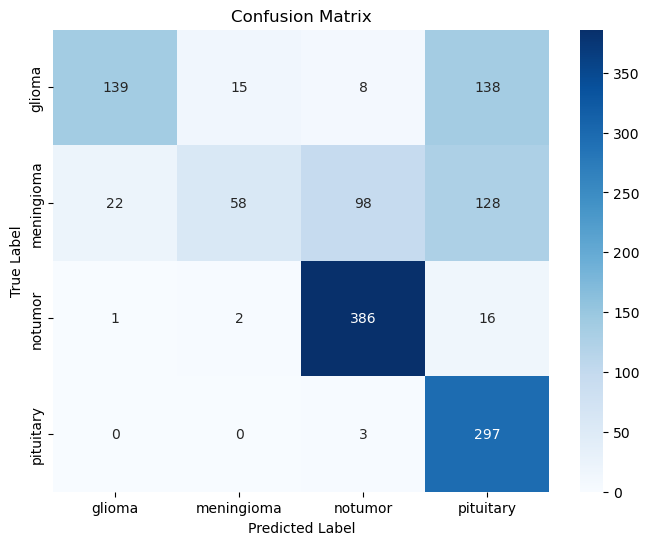

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6712 - loss: 1.2263
Test Accuracy = 67.12%


In [12]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

#print(classification_report(y_true, y_pred_classes))
#print(confusion_matrix(y_true, y_pred_classes))

# Step 3: Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Define class names (replace with your actual class labels)
class_labels = list(test_data.class_indices.keys())

# Step 5: Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

loss, acc = model.evaluate(test_data)
print(f"Test Accuracy = {acc*100:.2f}%")


##  Training and Validation Curves

Finally, we visualize the model’s performance using training and validation curves:

- Accuracy vs Epochs
- Loss vs Epochs

These plots help us understand how the model learned over time and whether it overfitted or underfitted.



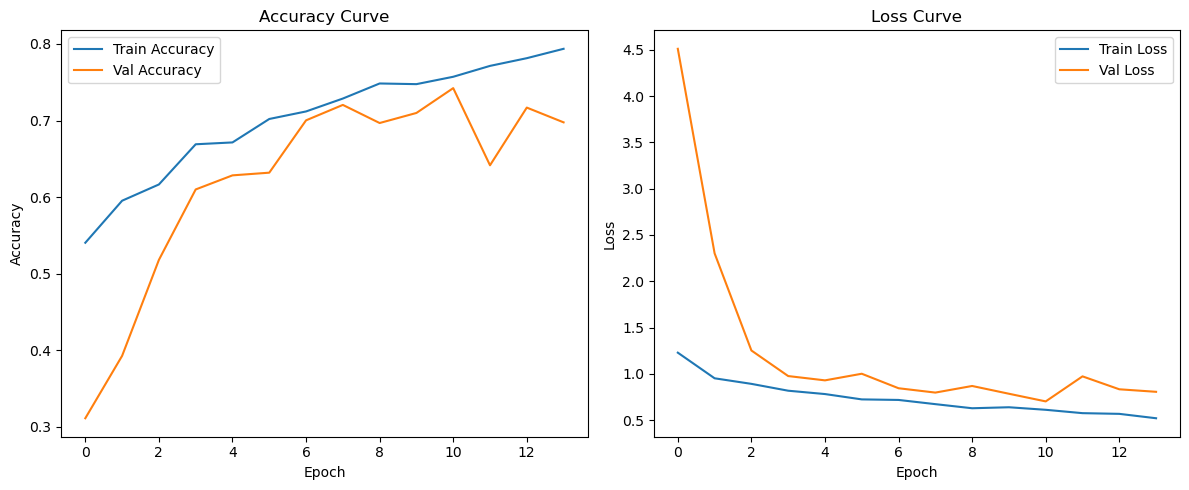

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
